<a href="https://colab.research.google.com/github/ArezooNajafi/Arezoo_Najafi-Portfolio/blob/master/Laptop_pricing_dataset_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install panadas
!pip install numpy


In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
!pip install requests
from requests import get

async def download(url, filename):
    response = get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [4]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [5]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [8]:
df1=df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df1.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lm=LinearRegression()
x=df1[['CPU_frequency']]
y=df1['Price']
lm.fit(x,y)
y_pred=lm.predict(x)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

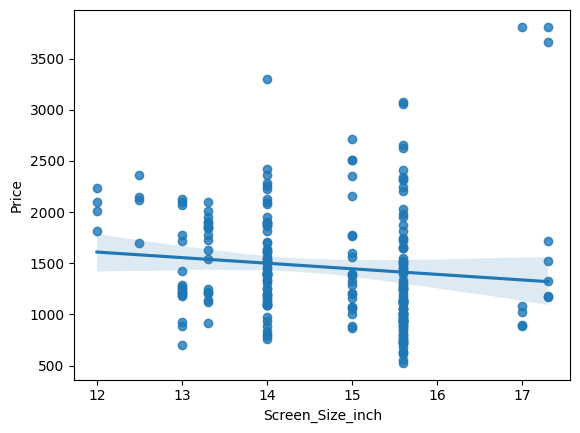

In [11]:
sns.regplot(x=df1['Screen_Size_inch'],y=df1['Price'])

In [12]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

In [13]:
lm = LinearRegression()

X = df1[['CPU_frequency']]
Y = df1['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

In [14]:
mse_slr = mean_squared_error(df1['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [15]:
lm=LinearRegression()
x=df1[['CPU_frequency']]
y=df1['Price']
lm.fit(x,y)
y_pred=lm.predict(x)

In [16]:
mse_slr = mean_squared_error(df1['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
r2=r2_score(y,y_pred)
print('R2:',r2 )
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

R2: 0.1344436321024326
The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [17]:
lm=LinearRegression()
x=df1[['CPU_frequency']]
y=df1['Price']
lm.fit(x,y)
y_pred=lm.predict(x)
mse_slr = mean_squared_error(df1['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
r2=r2_score(y,y_pred)
print('R2:',r2 )
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

R2: 0.1344436321024326
The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [18]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)
mse_slr = mean_squared_error(df1['Price'], Yhat)
r2=r2_score(y,Y_hat)
print(r2,mse_slr)

0.5082509055187374 284583.4405868629


<Axes: ylabel='Price'>

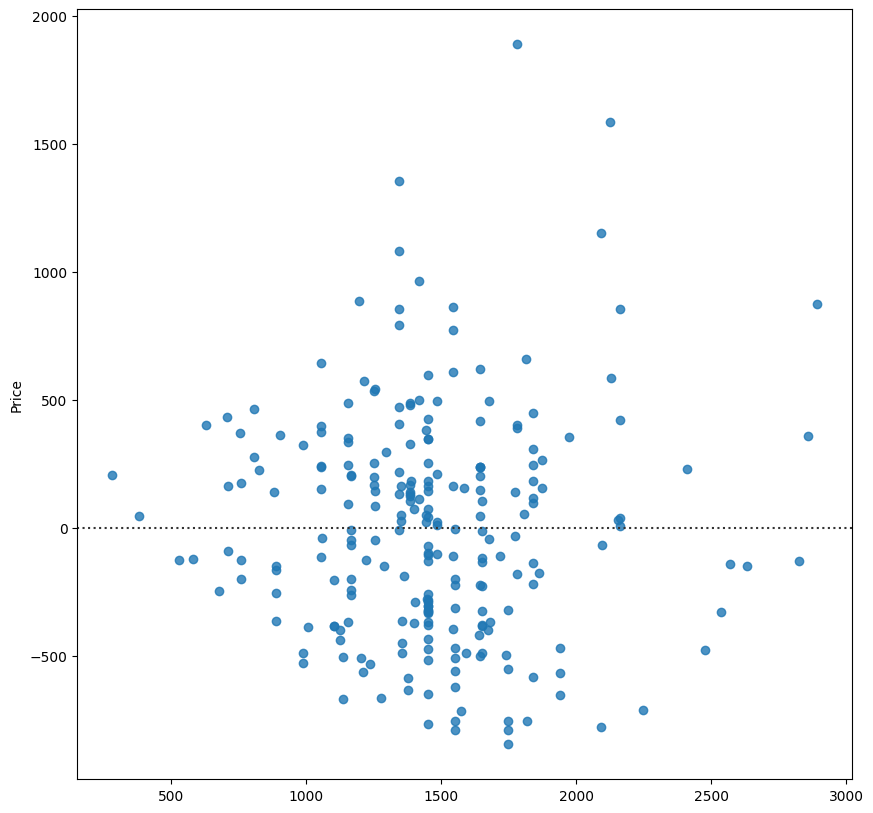

In [19]:
residuals = Y - Yhat
plt.figure(figsize=(10,10))
sns.residplot(x=Y_hat, y=residuals)


<ipython-input-20-4167617a6348>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-20-4167617a6348>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

Text(0, 0.5, 'Proportion of laptops')

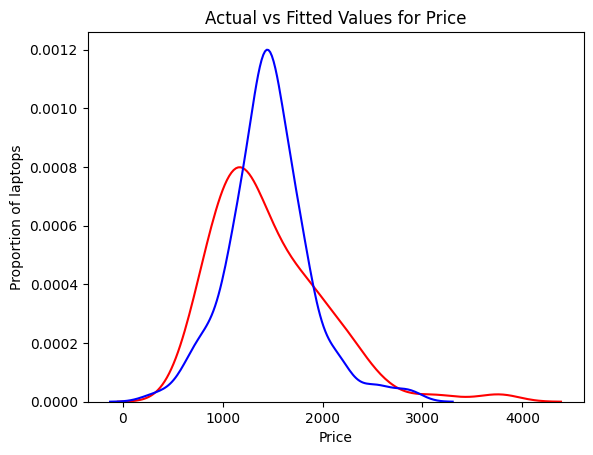

In [20]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
pl=PolynomialFeatures(degree=2)
x_polly=pl.fit_transform(x)
lm.fit(x_polly,y)
y_pred=lm.predict(x_polly)
mse_slr = mean_squared_error(df1['Price'], y_pred)
r2_score_slr = lm.score(x_polly, y_pred)
r2=r2_score(y,y_pred)
print('R2:',r2 )
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

R2: 0.24260120745423808
The R-square for Linear Regression is:  1.0
The mean square error of price and predicted value is:  249022.66596751162


<ipython-input-23-582064549b5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-23-582064549b5c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values"

Text(0, 0.5, 'Proportion of laptops')

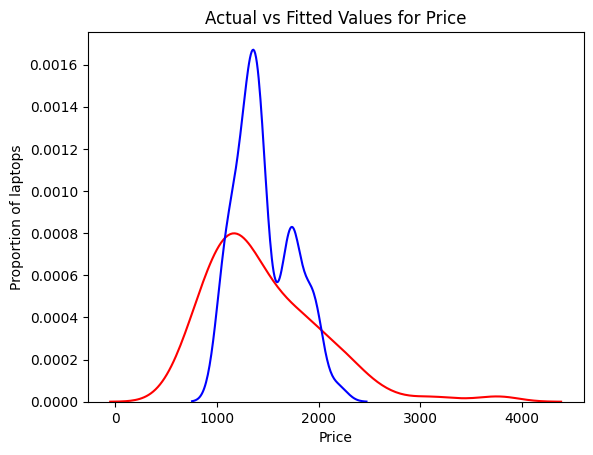

In [23]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [25]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [26]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

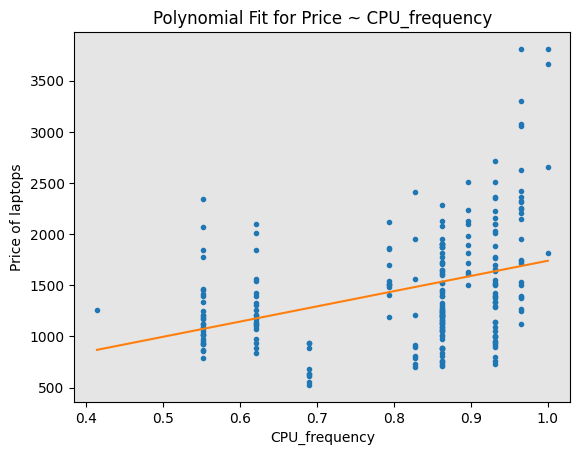

In [27]:
PlotPolly(p1, X, Y, 'CPU_frequency')

In [28]:
import numpy as np
import pandas as pd

# Create a NumPy array
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(array, columns=['A', 'B', 'C'])

# Perform a NumPy operation on the DataFrame
mean_values = np.mean(df, axis=0)

print("NumPy Array:")
print(array)

print("\nPandas DataFrame:")
print(df)

print("\nMean Values (computed using NumPy):")
print(mean_values)


NumPy Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Pandas DataFrame:
   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9

Mean Values (computed using NumPy):
A    4.0
B    5.0
C    6.0
dtype: float64


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pl=PolynomialFeatures(degree=2)
x=df1[['CPU_frequency']]
y=df1['Price']
x_new=pl.fit_transform(x)
lm.fit(x_new,y)
y_pred=lm.predict(x_new)
mse_slr = mean_squared_error(df1['Price'], y_pred)
r2_score_slr = lm.score(x_new, y_pred)
r2=r2_score(y,y_pred)
print('R2:',r2 )
print('The R-square for Linear Regression is: ', r2_score_slr)




R2: 0.24260120745423808
The R-square for Linear Regression is:  1.0


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Example data (replace with your actual DataFrame)
df1 = pd.DataFrame({
    'Screen_Size_inch': [14, 15, 16, 17, 18],  # Example data
    'Price': [600, 650, 700, 750, 800]        # Example data
})

# Reshape the data to fit the model
X = df1['Screen_Size_inch'].values.reshape(-1, 1)
y = df1['Price']

# Create polynomial features
pl = PolynomialFeatures(degree=2)
x_new = pl.fit_transform(X)

# Initialize and fit the model
lm = LinearRegression()
lm.fit(x_new, y)

# Predict using the polynomial features
y_pred = lm.predict(x_new)

# Calculate mean squared error
mse_slr = mean_squared_error(y, y_pred)

# Calculate R-squared score using lm.score
r2_score_slr = lm.score(x_new, y)

# Calculate R-squared score using r2_score
r2_score_manual = r2_score(y, y_pred)

print('The R-square for Linear Regression (lm.score) is: ', r2_score_slr)
print('The R-square for Linear Regression (r2_score) is: ', r2_score_manual)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression (lm.score) is:  1.0
The R-square for Linear Regression (r2_score) is:  1.0
The mean square error of price and predicted value is:  2.3264454728053903e-25


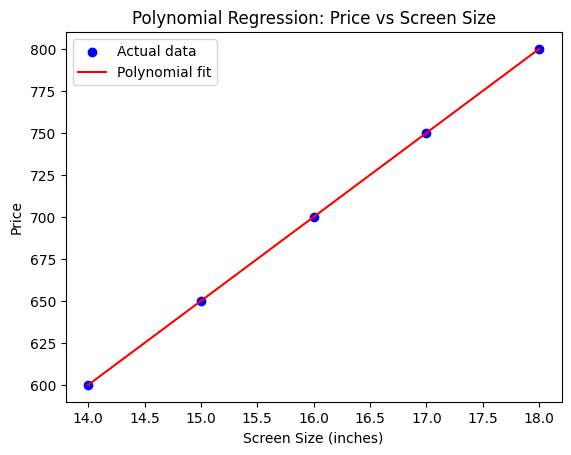

In [31]:
plt.scatter(X, y, color='blue', label='Actual data')

# Generate a smooth range of x values for plotting the curve (100 points between X.min() and X.max())
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = pl.transform(x_range)  # Transform these x values to polynomial features
y_range_pred = lm.predict(x_range_poly)  # Predict the corresponding y values using the model

# Plot the polynomial regression curve (red)
plt.plot(x_range, y_range_pred, color='red', label='Polynomial fit')

# Add labels and title
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.title('Polynomial Regression: Price vs Screen Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

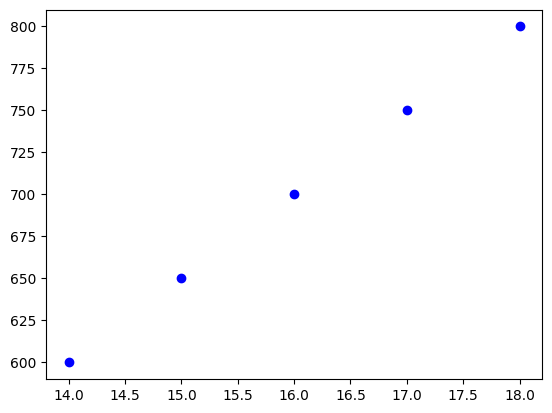

In [33]:
plt.scatter(X, y, color='blue', label='Actual data')


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Example DataFrame (replace with your actual DataFrame)


# Extract features and target variable
X = df1[['CPU_frequency']]
y = df1['Price']

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Predict using the pipeline
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = pipeline.predict(x_vals)

# Plot the data points and the polynomial fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPU_frequency', y='Price', data=df1, color='blue', label='Data Points')
plt.plot(x_vals, y_pred, color='orange', label='Polynomial Fit', linewidth=2)
plt.xlabel('CPU_frequency')
plt.ylabel('Price of laptops')
plt.title('Polynomial Fit for Price ~ CPU_frequency')
plt.legend()
plt.show()


KeyError: "None of [Index(['CPU_frequency'], dtype='object')] are in the [columns]"

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Check the column names in the dataframe
print(df1.columns)

# Define the target (y) and feature (x)
y = df1['Price']
x = df1[['CPU_frequency']]  # Ensure the column name matches

# Define the pipeline steps
pipeline = Pipeline([
    ('scale', StandardScaler()),  # Step 1: Standardize the data
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Step 2: Apply Polynomial Features
    ('model', LinearRegression())  # Step 3: Apply Linear Regression
])

# Fit the pipeline
pipeline.fit(x, y)

# Predict using the pipeline
y_pred = pipeline.predict(x)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Calculate the R2 score
r2 = r2_score(y, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Index(['Screen_Size_inch', 'Price'], dtype='object')


KeyError: "None of [Index(['CPU_frequency'], dtype='object')] are in the [columns]"

In [ ]:
X=df1[['CPU_frequency']]
Y=df1['Price']
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

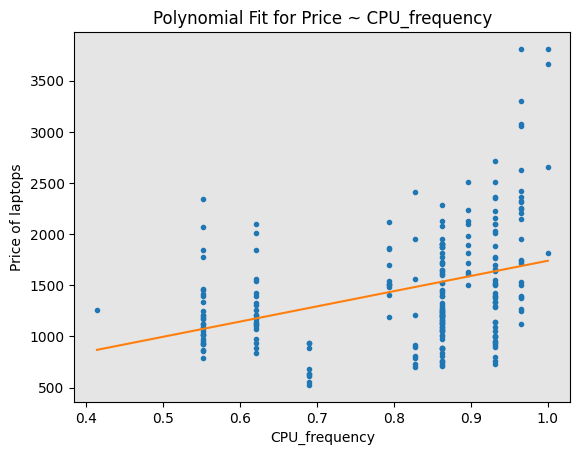

In [ ]:
PlotPolly(p1, X, Y, 'CPU_frequency')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


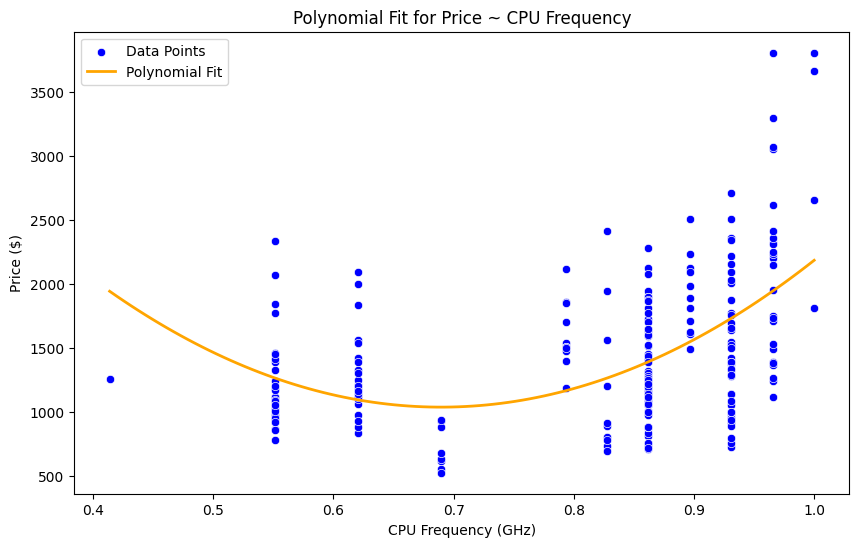

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract features and target variable
X = df1[['CPU_frequency']]
y = df1['Price']

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Generate a range of values over the full range of CPU_frequency
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict using the pipeline
y_pred = pipeline.predict(x_range)

# Plot the data points and the polynomial fit
plt.figure(figsize=(10, 6))


sns.scatterplot(x='CPU_frequency', y='Price', data=df1, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='orange', label='Polynomial Fit', linewidth=2)
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price ($)')
plt.title('Polynomial Fit for Price ~ CPU Frequency')
plt.legend()
plt.show()


In [ ]:
df1['CPU_frequency']

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


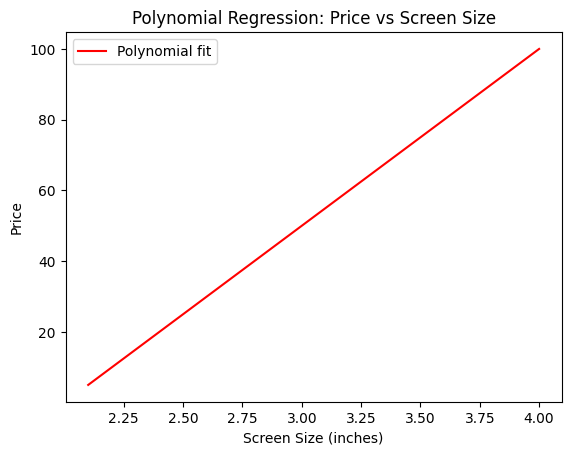

In [ ]:
# Generate a smooth range of x values for plotting the curve (100 points between X.min() and X.max())
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = pl.transform(x_range)  # Transform these x values to polynomial features
y_range_pred = lm.predict(x_range_poly)  # Predict the corresponding y values using the model

# Plot the polynomial regression curve (red)
plt.plot(x_range, y_range_pred, color='red', label='Polynomial fit')

# Add labels and title
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.title('Polynomial Regression: Price vs Screen Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

NameError: name 'Name' is not defined

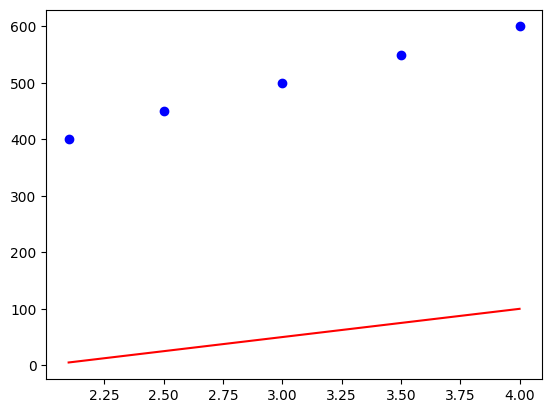

In [ ]:
# Plot actual data points as blue dots
plt.scatter(X, y, color='blue', label='Actual data')

# Generate 100 points for a smooth polynomial curve
x_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate 100 evenly spaced points
x_new_poly = pl.transform(x_new)  # Transform these points into polynomial features
y_new = lm.predict(x_new_poly)  # Predict the corresponding y values using the model

# Plot the polynomial regression curve as a red line
plt.plot(x_new, y_new, color='red', label='Polynomial fit')

# Set the labels, title, and background color
plt.title(f'Polynomial Fit for Price ~ {Name}')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.xlabel(Name)
plt.ylabel('Price of laptops')

# Show the plot
plt.legend()
plt.show()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


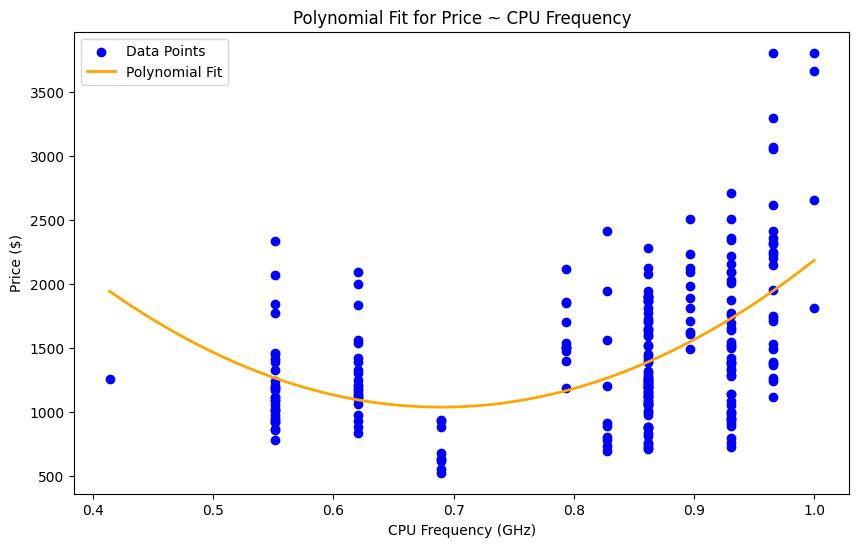

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
X = df1[['CPU_frequency']]  # Independent variable (CPU_frequency)
y = df1['Price']  # Dependent variable (Price)

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Change degree if needed
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to all data points
pipeline.fit(X, y)

# Generate predictions for a smooth curve using all possible CPU frequencies
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Range for x-axis
y_pred = pipeline.predict(x_range)  # Predict prices for this range

# Plot all data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot for all points
plt.plot(x_range, y_pred, color='orange', label='Polynomial Fit', linewidth=2)  # Polynomial fit curve

# Add labels, title, and legend
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price ($)')
plt.title('Polynomial Fit for Price ~ CPU Frequency')
plt.legend()
plt.show()


In [ ]:
# Assuming df1 contains the data
# Assuming df1 is your DataFrame

# Filter the DataFrame for rows where CPU_frequency is 4
filtered_df = df1['CPU_frequency'] == 4

print(filtered_df)


0      False
1      False
2      False
3      False
4      False
       ...  
233    False
234    False
235    False
236    False
237    False
Name: CPU_frequency, Length: 238, dtype: bool


In [ ]:
filtered1_df = df1[df1['CPU_frequency'] == 4]
print(filtered1_df)


Empty DataFrame
Columns: [Manufacturer, Category, GPU, OS, CPU_core, Screen_Size_inch, CPU_frequency, RAM_GB, Storage_GB_SSD, Weight_pounds, Price, Price-binned, Screen-Full_HD, Screen-IPS_panel]
Index: []


In [ ]:
filtered_df = df1[df1['CPU_frequency'] == 4]  # Filter rows
prices_for_cpu_4 = filtered_df['Price'].values  # Extract values
prices_for_cpu_4

array([], dtype=int64)

In [ ]:
filtered_df = df1[df1['CPU_frequency'] == 4]

# Extract prices
prices_for_cpu_4 = filtered_df['Price'].values
print(prices_for_cpu_4)


KeyError: 'CPU_frequency'

In [ ]:
series = df[df['CPU_frequency']]
print(type(series))  # Output: <class 'pandas.core.series.Series'>
series

KeyError: "None of [Index([0.5517241379310345, 0.6896551724137931, 0.9310344827586208,\n       0.5517241379310345, 0.6206896551724138, 0.5517241379310345,\n       0.5517241379310345, 0.5517241379310345, 0.8620689655172414,\n       0.6206896551724138,\n       ...\n        0.793103448275862, 0.8620689655172414, 0.8620689655172414,\n       0.9655172413793104,  0.793103448275862,  0.896551724137931,\n       0.8275862068965517,  0.896551724137931, 0.8620689655172414,\n        0.793103448275862],\n      dtype='float64', length=238)] are in the [columns]"

In [ ]:
filtered_df = df1[(df1['CPU_frequency'] == 1) & (df1['RAM_GB'] == 8)] # Extract specific columns
result = filtered_df[['OS', 'Price']].values
result

array([[   1, 1813],
       [   1, 2655]])

In [ ]:
filtered_df = df1[df1['CPU_frequency'] == 4]
prices_for_cpu_4 = filtered_df['Price']
prices_for_cpu_4

,Price
